Trying to simply combine a large number of catalogs with the Laigle+16 catalog (Photometry for more objects), The Davies+15 (V05) catalog (A lot of spectroscopic redshifts), the DIEMOS redshift catalog, and the three morphology catalogs. This should provide a large number of redshifts for a large number of objects. Can go to higher apparent magnitude (avoid problems with incompleteness). I'm hoping this will help with number of galaxies we have? Should be simple, don't want to take too long doing this. 

| Date | Person | Change |
| :- | :- | :--------: |
04/16/2019  |  L. Hunt  |  <ul><li>Initial Version</li><li>Import fits table</li><li>Import other text tables</li></ul>

Import numerical packages

In [1]:
import pandas as pd
import numpy as np
from itertools import combinations

Import Astronomy Packages

In [2]:
import astropy as ap
from astropy import units as u
from astropy.coordinates import SkyCoord
import kcorrect
import kcorrect.utils as ut
from astropy.cosmology import FlatLambdaCDM
from astropy.table import Table

Import misc./plotting packages

In [3]:
import os
import matplotlib.pyplot as plt

# Setup

In [4]:
cosmo=FlatLambdaCDM(H0=70,Om0=0.3)

In [6]:
def make_kcorr_filt_template(dataframe):
    '''This task will make a kcorrect filter template from a dataframe that optimizes the number of objects with detections in a subset of filters. In this case the dataframe should contain cfht, subaru, and irac wideband filters. '''
    kcordir=os.environ["KCORRECT_DIR"]
    lambdar_to_kcorr={'mag_cfht_u':'capak_cfht_megaprime_sagem_u.par','mag_subaru_B':'capak_subaru_suprimecam_B.par','mag_subaru_V':'capak_subaru_suprimecam_V.par','mag_subaru_g':'capak_subaru_suprimecam_g.par','mag_subaru_r':'capak_subaru_suprimecam_r.par','mag_subaru_i':'capak_subaru_suprimecam_i.par','mag_subaru_z':'capak_subaru_suprimecam_z.par','mag_irac_1':'spitzer_irac_ch1.par','mag_irac_2':'spitzer_irac_ch2.par','mag_irac_3':'spitzer_irac_ch3.par','mag_irac_4':'spitzer_irac_ch4.par'}
    numb1=0
    numb2=0
    numb3=0
    numb4=0
    numb5=0
    flist1=[]
    flist2=[]
    flist3=[]
    flist4=[]
    flist5=[]
    ilist1=[]
    ilist2=[]
    ilist3=[]
    ilist4=[]
    ilist5=[]
    kcor_template=kcordir+'/data/templates/temp_filt_list.dat'
    for x in combinations(list(dataframe),5):
        if len(dataframe[(dataframe[x[0]]<40)&(dataframe[x[1]]<40)&(dataframe[x[2]]<40)&(dataframe[x[3]]<40)&(dataframe[x[4]]<40)]) > numb1:
            ilist5=ilist4
            ilist4=ilist3
            ilist3=ilist2
            ilist2=ilist1
            ilist1=dataframe[(dataframe[x[0]]<40)&(dataframe[x[1]]<40)&(dataframe[x[2]]<40)&(dataframe[x[3]]<40)&(dataframe[x[4]]<40)].index.tolist()
            numb5=numb4
            numb4=numb3
            numb3=numb2
            numb2=numb1
            numb1=len(ilist1)
            flist5=flist4
            flist4=flist3
            flist3=flist2
            flist2=flist1
            flist1=x
    with open(kcor_template,'w') as file:
        file.write('KCORRECT_DIR\n')
        for filt in flist1:
            file.write('data/filters/'+lambdar_to_kcorr[filt]+'\n')
    return flist1,kcor_template

In [5]:
kcordir=os.environ["KCORRECT_DIR"]
catbasedir=os.environ["LUMFUNC_CATS"]

Reading catalogs into pandas databases

In [7]:
print('Reading Catalogs')

Reading Catalogs


Photometry

In [8]:
laigle_table=Table.read(catbasedir+'/Photometry/COSMOS2015_Laigle+_v1.1.fits')
initial_laigle_df=laigle_table.to_pandas()

/Users/lucashunt/programs/anaconda3/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3265: TableReplaceWarning: converted column 'ID_XMM' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/lucashunt/programs/anaconda3/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3265: TableReplaceWarning: converted column 'ID_CHANDRA09' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/lucashunt/programs/anaconda3/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3265: TableReplaceWarning: converted column 'FLAG_XRAYBLEND' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)


In [9]:
laigle_df=initial_laigle_df.loc[(initial_laigle_df.FLAG_HJMCC==0) &
                                (initial_laigle_df.FLAG_COSMOS==1) & 
                                (initial_laigle_df.FLAG_PETER==0)][['NUMBER',
 'ID2006',
 'ID2008',
 'ALPHA_J2000',
 'DELTA_J2000',
 'FLUX_RADIUS',
 'u_MAG_AUTO',
 'u_MAGERR_AUTO',
 'B_MAG_AUTO',
 'B_MAGERR_AUTO',
 'V_MAG_AUTO',
 'V_MAGERR_AUTO',
 'r_MAG_AUTO',
 'r_MAGERR_AUTO',
 'ip_MAG_AUTO',
 'ip_MAGERR_AUTO',
 'zpp_MAG_AUTO',
 'zpp_MAGERR_AUTO',
 'Y_MAG_AUTO',
 'Y_MAGERR_AUTO',
 'J_MAG_AUTO',
 'J_MAGERR_AUTO',
 'H_MAG_AUTO',
 'H_MAGERR_AUTO',
 'Ks_MAG_AUTO',
 'Ks_MAGERR_AUTO',
 'ZPDF',
 'TYPE'
]]

laigle_df=initial_laigle_df[['NUMBER',
 'ID2006',
 'ID2008',
 'ALPHA_J2000',
 'DELTA_J2000',
 'FLUX_RADIUS',
 'u_MAG_AUTO',
 'u_MAGERR_AUTO',
 'B_MAG_AUTO',
 'B_MAGERR_AUTO',
 'V_MAG_AUTO',
 'V_MAGERR_AUTO',
 'r_MAG_AUTO',
 'r_MAGERR_AUTO',
 'ip_MAG_AUTO',
 'ip_MAGERR_AUTO',
 'zpp_MAG_AUTO',
 'zpp_MAGERR_AUTO',
 'Y_MAG_AUTO',
 'Y_MAGERR_AUTO',
 'J_MAG_AUTO',
 'J_MAGERR_AUTO',
 'H_MAG_AUTO',
 'H_MAGERR_AUTO',
 'Ks_MAG_AUTO',
 'Ks_MAGERR_AUTO',
 'ZPDF',
 'TYPE'
]]

Spectroscopy

In [32]:
typedict={'char':str,'double':np.float64,'float':np.float64,'int':np.int}
with open(catbasedir+'/Spectroscopy/deimos_10k_March2018/deimos_redshifts.tbl') as deimos:
    file=deimos.readlines()
    for line in file:
        deimos_dict=dict(zip(file[71].split(),[typedict[f] for f in file[72].split()]))

In [49]:
davies_table=Table.read(catbasedir+'/Spectroscopy/G10CosmosCatv05/G10COSMOSCatv05.fits')
davies_df=davies_table.to_pandas()
deimos_df=pd.read_csv(
    catbasedir+'/Spectroscopy/deimos_10k_March2018/deimos_redshifts.tbl',     delim_whitespace=True,
    header=71,
    dtype=deimos_dict,
    error_bad_lines=False,
    skiprows=[72,73,74])

b'Skipping line 136: expected 10 fields, saw 11\nSkipping line 142: expected 10 fields, saw 11\nSkipping line 144: expected 10 fields, saw 11\nSkipping line 147: expected 10 fields, saw 11\nSkipping line 150: expected 10 fields, saw 11\nSkipping line 153: expected 10 fields, saw 11\nSkipping line 158: expected 10 fields, saw 11\nSkipping line 160: expected 10 fields, saw 11\nSkipping line 175: expected 10 fields, saw 11\nSkipping line 191: expected 10 fields, saw 11\nSkipping line 196: expected 10 fields, saw 11\nSkipping line 221: expected 10 fields, saw 11\nSkipping line 226: expected 10 fields, saw 11\nSkipping line 232: expected 10 fields, saw 11\nSkipping line 237: expected 10 fields, saw 11\nSkipping line 242: expected 10 fields, saw 11\nSkipping line 253: expected 10 fields, saw 11\nSkipping line 271: expected 10 fields, saw 11\nSkipping line 290: expected 10 fields, saw 11\nSkipping line 309: expected 10 fields, saw 11\nSkipping line 321: expected 10 fields, saw 11\nSkipping li

Adding objects that were skipped because some columns had two values
(Note, had to go through and manually edit text file because some parts of the notes column had spaces as well. These were found by printing x_series.Q It should be a number so if it has a molecular line identifier in it the notes section has a space. Quickest to just edit these.)

In [50]:
with open(catbasedir+'/Spectroscopy/deimos_10k_March2018/deimos_redshifts.tbl') as deimos:
    file=deimos.readlines()
    i=0
    for line in file:
        if (len(line.split())==11) & (i>74):
            x=line.split()
            del x[3]
            x_series=pd.Series(x,index=file[71].split())
            deimos_df=deimos_df.append(x_series,ignore_index=True)
        i=i+1

deimos_df.columns='deimos_'+deimos_df.columns.str.lower()

Now create SkyCoord arrays with astropy to match catalogs

In [51]:
davies_coord=SkyCoord(ra=davies_df['RA_06'].values*u.degree,
                     dec=davies_df['DEC_06'].values*u.degree)
deimos_coord=SkyCoord(ra=deimos_df['deimos_ra'].values*u.degree,
                     dec=deimos_df['deimos_dec'].values*u.degree)
laigle_coord=SkyCoord(ra=laigle_df['ALPHA_J2000'].values*u.degree,
                     dec=laigle_df['DELTA_J2000'].values*u.degree)

In [52]:
print(deimos_df.columns)

deimos_df['catalog']=np.nan

deimos_df.loc[deimos_df.deimos_id.str.startswith('L',na=False),'catalog']='L'

deimos_df.loc[deimos_df.deimos_id.str.startswith('C',na=False),'catalog']='C'

Index(['deimos_id', 'deimos_ra', 'deimos_dec', 'deimos_sel', 'deimos_imag',
       'deimos_kmag', 'deimos_zspec', 'deimos_qf', 'deimos_q',
       'deimos_remarks'],
      dtype='object')


In [53]:
deimos_df.loc[deimos_df.deimos_id.str.startswith('L',na=False),'deimos_id']=deimos_df.loc[deimos_df.deimos_id.str.startswith('L',na=False),'deimos_id'].str.strip('L').astype(int)

deimos_df.loc[deimos_df.deimos_id.str.startswith('C',na=False),'deimos_id']=deimos_df.loc[deimos_df.deimos_id.str.startswith('C',na=False),'deimos_id'].str.strip('C').astype(int)


In [54]:
len(deimos_df.loc[deimos_df.catalog=='L'])

9843

In [72]:
join_laigle_deimos=pd.merge(left=laigle_df,
                            right=deimos_df[['deimos_id',
                                             'deimos_ra',
                                             'deimos_dec',
                                             'deimos_zspec',
                                             'deimos_qf',
                                             'catalog']],
                            how='left',
                            left_on=['NUMBER'],
                            right_on=['deimos_id'])

join_laigle_deimos=pd.merge(left=join_laigle_deimos_l,
                            right=deimos_df[['deimos_id',
                                             'deimos_ra',
                                             'deimos_dec',
                                             'deimos_zspec',
                                             'deimos_qf',
                                             'catalog']],
                            how='left',
                            left_on=['ID2006'],
                            right_on=['deimos_id'])

In [83]:
join_laigle_deimos['catalog']=np.nan
join_laigle_deimos.catalog.fillna(join_laigle_deimos.catalog_x,inplace=True)
join_laigle_deimos.catalog.fillna(join_laigle_deimos.catalog_y,inplace=True)

In [87]:
join_laigle_deimos.loc[join_laigle_deimos.catalog_y.isnull()==False]

,NUMBER,ID2006,ID2008,ALPHA_J2000,DELTA_J2000,FLUX_RADIUS,u_MAG_AUTO,u_MAGERR_AUTO,B_MAG_AUTO,B_MAGERR_AUTO,...,deimos_zspec_x,deimos_qf_x,catalog_x,deimos_id_y,deimos_ra_y,deimos_dec_y,deimos_zspec_y,deimos_qf_y,catalog_y,catalog
92,220157,244365,156136,149.763835,1.615389,3.353243,99.000000,99.000000,27.603439,0.238935,...,NaN,NaN,NaN,244365,150.365,1.65398,0.785,1,L,L
107,220187,209132,134975,150.002041,1.615321,13.300000,25.947775,0.080255,25.980461,0.075509,...,NaN,NaN,NaN,209132,150.152,1.59699,1.163,4,L,L
814,221748,245100,157299,149.832328,1.616090,4.940759,24.164068,0.040370,24.015099,0.027348,...,NaN,NaN,NaN,245100,150.595,1.65395,1.062,9,L,L
1420,222923,208027,134229,150.002303,1.620023,4.676067,27.173206,0.249370,26.834190,0.144030,...,NaN,NaN,NaN,208027,149.849,1.59543,1.316,3,L,L
1787,223609,279891,179141,149.614702,1.621143,1.818366,99.000000,99.000000,28.484213,0.428192,...,NaN,NaN,NaN,279891,150.525,1.71144,NaN,0,L,L
1815,223660,318763,202195,149.483908,1.621144,1.084780,27.620262,0.673022,27.521488,0.344420,...,NaN,NaN,NaN,318763,149.87,1.76865,0.935,3,L,L
1877,223785,243908,156664,149.892979,1.621439,2.641719,27.260504,0.390733,26.795448,0.147863,...,NaN,NaN,NaN,243908,150.559,1.64942,0,4,L,L
1991,223997,207651,133936,149.943275,1.621598,0.835224,27.635391,0.640989,26.470945,0.148929,...,NaN,NaN,NaN,207651,150.028,1.59428,NaN,0,L,L
2058,224109,318652,202133,149.468997,1.621444,5.031967,26.009167,0.141535,25.536438,0.063520,...,NaN,NaN,NaN,318652,150.085,1.77037,1.166,2,L,L
2558,225054,318196,201842,149.462569,1.623512,8.910376,99.000000,99.000000,99.000000,99.000000,...,NaN,NaN,NaN,318196,149.761,1.7715,0.6632,4,L,L


/Users/lucashunt/programs/anaconda3/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


        NUMBER   ID2006   ID2008  ALPHA_J2000  DELTA_J2000  FLUX_RADIUS  \
0       216439   280662   179895   149.697606     1.616639    35.327869   
1       218604   243976   156755   149.749393     1.618068     6.475492   
2       219020   170487   110901   150.125093     1.616900     9.815763   
3       219656   137153    90210   150.388349     1.614538    -3.294914   
4       219657   140723    90222   150.383607     1.614532    13.300000   
5       219713   137119    90188   150.276828     1.614629     3.980255   
6       219741    98022    68814   150.402935     1.614631     3.034032   
7       219743   137044    89868   150.295083     1.614662     4.297476   
8       219744   136987    90182   150.239919     1.614675     5.636032   
9       219769   171641   111697   150.180826     1.614706     4.094939   
10      219785   171630   111677   150.106318     1.614745     2.888474   
11      219812   136996    90196   150.249091     1.614780     3.667083   
12      219816   137139  

(array([ 5516.,  1602.,   342.,    86.,    69.,    57.,    39.,    33.,
           30.,    30.,    37.,    38.,    49.,    45.,    53.]),
 array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ,
         2.2,  2.4,  2.6,  2.8,  3. ]),
 <a list of 15 Patch objects>)

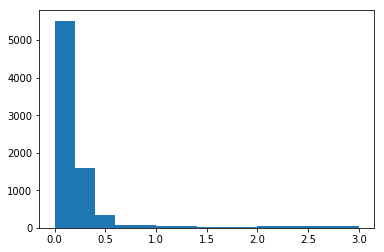

In [53]:
laigle_df.loc[laigle_df.index[idx_deimos],'deimos_id']=np.array(deimos_df.ID)
deimos_laigle=deimos_df.loc[deimos_df.ID.str.startswith('L',na=False)]
deimos_laigle['ID']=deimos_laigle.ID.str.strip('L').astype(int)
result=pd.merge(laigle_df,deimos_laigle,how='left',left_on=['NUMBER'],right_on=['ID'])
#print(result)
#print(laigle_deimos)
#print(laigle_df.loc[laigle_df.index[idx_deimos]][['NUMBER','ID2006','deimos_id']])
plt.hist(d2d.arcsec,range=[0,3],bins=15)

In [14]:
idx_deimos,d2d,d3d=deimos_coord.match_to_catalog_sky(laigle_coord)

In [14]:
idx_laigle_deimos,idx_deimos_laigle,d2d_lde,d3d_lde=deimos_coord.search_around_sky(laigle_coord,1*u.arcsecond)
idx_laigle_davies,idx_davies_laigle,d2d_lda,d3d_lda=davies_coord.search_around_sky(laigle_coord,1*u.arcsecond)

In [81]:
print(len(idx_laigle_davies))

228530


In [82]:
# This code will check to see if a source in one catalog is matched to more than one source in the other
#Also creates a mask_lda array that will then remove those values from matching! 

mask_lda=np.ones(len(idx_laigle_davies),dtype=bool)
separation_list=[]
three_obj_within_1_arcsec=[]
for i in range(0,len(idx_laigle_davies)-2):
    if idx_davies_laigle[i]==idx_davies_laigle[i+1]:
        separation_list.append(
            [d2d_lda[i].arcsecond,
             d2d_lda[i+1].arcsecond])
        if d2d_lda[i]>d2d_lda[i+1]:
            mask_lda[i]=False
        if d2d_lda[i]<d2d_lda[i+1]:
            mask_lda[i+1]=False
        if d2d_lda[i]==d2d_lda[i+1]:
            mask_lda[i+1]=False
    if idx_laigle_davies[i]==idx_laigle_davies[i+2]:
        three_objs=d2d_lda[i:i+3].arcsecond
        three_objs_dict={d2d_lda[i].arcsecond:str(i+1)+' '+str(i+2),d2d_lda[i+1].arcsecond:str(i)+' '+str(i+2),d2d_lda[i+2].arcsecond:str(i)+' '+str(i+1)}
        further_objs=np.array(
            three_objs_dict[min(three_objs)].split()).astype('int')
        mask_lda[further_objs]=False
        three_obj_within_1_arcsec.append(
            [d2d_lda[i].arcsecond,
             d2d_lda[i+1].arcsecond,
             d2d_lda[i+2].arcsecond])

In [83]:
# This code will check to see if a source in one catalog is matched to more than one source in the other
#Also creates a mask_lde array that will then remove those values from matching! 

mask_lde=np.ones(len(idx_laigle_deimos),dtype=bool)
separation_list=[]
three_obj_within_1_arcsec=[]
for i in range(0,len(idx_laigle_deimos)-2):
    if idx_deimos_laigle[i]==idx_deimos_laigle[i+1]:
        separation_list.append(
            [d2d_lda[i].arcsecond,
             d2d_lda[i+1].arcsecond])
        if d2d_lda[i]>d2d_lda[i+1]:
            mask_lde[i]=False
        if d2d_lda[i]<d2d_lda[i+1]:
            mask_lde[i+1]=False
        if d2d_lda[i]==d2d_lda[i+1]:
            mask_lde[i+1]=False
    if idx_laigle_deimos[i]==idx_laigle_deimos[i+2]:
        three_objs=d2d_lda[i:i+3].arcsecond
        three_objs_dict={d2d_lda[i].arcsecond:str(i+1)+' '+str(i+2),d2d_lda[i+1].arcsecond:str(i)+' '+str(i+2),d2d_lda[i+2].arcsecond:str(i)+' '+str(i+1)}
        further_objs=np.array(
            three_objs_dict[min(three_objs)].split()).astype('int')
        mask_lde[further_objs]=False
        three_obj_within_1_arcsec.append(
            [d2d_lda[i].arcsecond,
             d2d_lda[i+1].arcsecond,
             d2d_lda[i+2].arcsecond])

In [84]:
idx_davies_laigle=np.copy(idx_davies_laigle)[mask_lda]
idx_laigle_davies=np.copy(idx_laigle_davies)[mask_lda]
idx_deimos_laigle=np.copy(idx_deimos_laigle)[mask_lde]
idx_laigle_deimos=np.copy(idx_laigle_deimos)[mask_lde]

In [99]:
np.array(davies_df.Z_USE[idx_davies_laigle])

array([1, 4, 4, ..., 2, 2, 2], dtype=int16)

In [100]:
laigle_df.loc[laigle_df.index[idx_laigle_davies],'match_spec_z']=True
laigle_df.loc[laigle_df.index[idx_laigle_davies],'match_spec_z']=True
laigle_df.loc[laigle_df.index[idx_laigle_deimos],'match_spec_z']=True
laigle_df.loc[laigle_df.index[idx_laigle_davies],'Z_USE']=np.array(davies_df.Z_USE[idx_davies_laigle])
laigle_df.loc[laigle_df.match_spec_z!=laigle_df.match_spec_z,'match_spec_z']=False

/Users/lucashunt/programs/anaconda3/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [86]:
laigle_df.loc[laigle_df.ID2006>0]
davies_df.loc[davies_df.ID_06<0]

,CATAID,ID_06,RA_06,DEC_06,I_FWHM_06,I_STAR_06,I_MAG_AUTO_06,AUTO_FLAG_06,U_06,U_06_ERR,...,ZQUALITY_VVDS,RA_SDSS,DEC_SDSS,CLASS_SDSS,Z_SDSS,Z_ERR_SDSS,ZP_COSMOS2015,ZL68_COSMOS2015,ZH68_COSMOS2015,CHI2_COSMOS2015


In [112]:
laigle_davies_08=pd.merge(laigle_df,davies_df,how='inner',left_on=['ID2008'],right_on=['ID_08'])

In [113]:
laigle_davies_06=pd.merge(laigle_df,davies_df,how='left',left_on=['ID2006'],right_on=['ID_06'])

In [115]:
print(len(laigle_davies_06))
print(len(laigle_davies_08))
print(len(davies_df))
print(len(laigle_df))

536077
224229
438226
536077


23779
29204


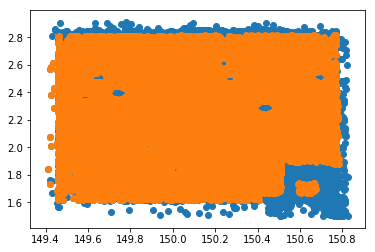

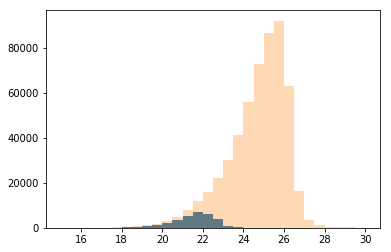

In [121]:
plt.scatter(davies_df.loc[davies_df.Z_USE<4]['RA_06'],davies_df.loc[davies_df.Z_USE<4]['DEC_06'])
plt.scatter(laigle_davies_08.loc[laigle_davies_08.Z_USE<4]['RA_06'],laigle_davies_08.loc[laigle_davies_08.Z_USE<4]['DEC_06'])
plt.figure()
plt.hist(laigle_davies_06.loc[laigle_davies_06.Z_USE<4]['zpp_MAG_AUTO'],bins=30,range=[15,30])
plt.hist(laigle_davies_06['zpp_MAG_AUTO'],bins=30,range=[15,30],alpha=0.3)

print(len(laigle_davies_06.loc[laigle_davies_06.Z_USE<3]))
print(len(davies_df.loc[davies_df.Z_USE<3]))
